In [83]:
import matplotlib.pyplot as plt
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit.circuit.library import *
from qiskit_aer.noise import (NoiseModel, depolarizing_error)

In [117]:
# Define the noise model
def noise():
    i_error = depolarizing_error(0.3, 1)
    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(i_error, "i_with_error")
    return noise_model


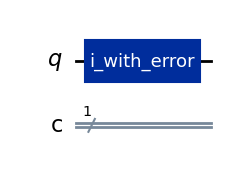

In [96]:
# Define the noisy gate
def noise_circuit():
    # This should be qc = QuantumCircuit(1)
    # Measuring for demostration purposes
    qc = QuantumCircuit(1,1)
    i_gate = IGate(label="i_with_error")
    qc.append(i_gate, [0])
    return qc

# Draw the resulting circuit
noise_circuit().draw('mpl')

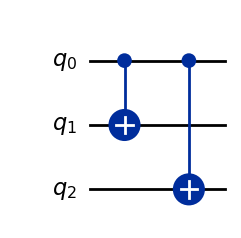

In [97]:
# 3 qubit encoding circuit
def encoding_circuit():
    qc = QuantumCircuit(3)
    qc.cx(0,1)
    qc.cx(0,2)
    return qc

# Draw the resulting circuit
encoding_circuit().draw('mpl')

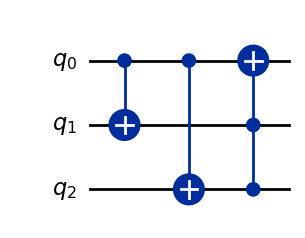

In [98]:
# 3 qubit decoding circuit
def decoding_circuit():
    qc = QuantumCircuit(3)
    qc.cx(0,1)
    qc.cx(0,2)
    qc.ccx(2, 1, 0)   
    return qc

# Draw the resulting circuit
decoding_circuit().draw('mpl')

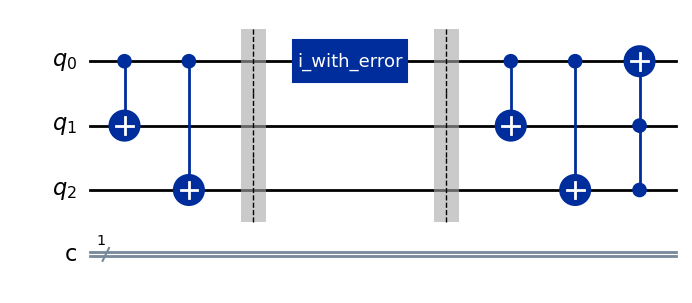

In [99]:
# 3 qubit bit flip correcting circuit
def bit_correcting_circuit():
    
    # Ecode the qubits
    qc = encoding_circuit()
    
    qc.barrier()
    
    # Compose with the noise circuit
    qc = qc.compose(noise_circuit(), 0)
    
    qc.barrier()
    
    # Compose with the decoding circuit
    qc = qc.compose(decoding_circuit(), [0,1,2])

    return qc

# Draw the resulting circuit
bit_correcting_circuit().draw('mpl')

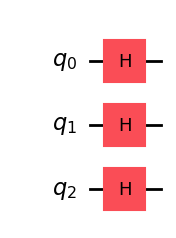

In [100]:
# 3 qubit hadamard addition
def phase_correction():
    qc = QuantumCircuit(3)
    qc.h(0)
    qc.h(1)
    qc.h(2)
    return qc

# Draw the resulting circuit
phase_correction().draw('mpl')

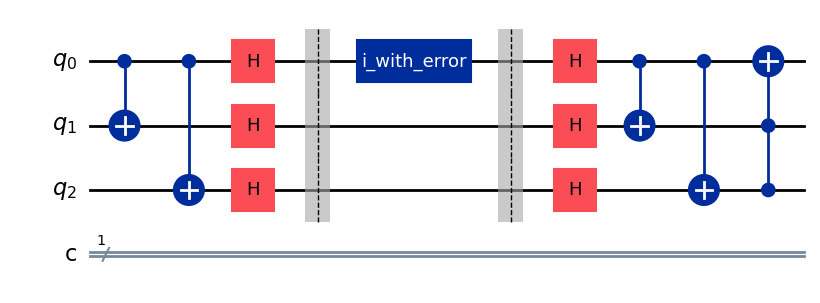

In [101]:
# 3 qubit phase correcting circuit
def phase_correcting_circuit():
        
    # Ecode the qubits
    qc = encoding_circuit()
    
    # Apply phase corrections
    qc = qc.compose(phase_correction(), [0,1,2])
    
    qc.barrier()
    
    # Compose with the noise circuit
    qc = qc.compose(noise_circuit(), 0)
    
    qc.barrier()
    
    # Apply phase corrections
    qc = qc.compose(phase_correction(), [0,1,2])
    
    # Compose with the decoding circuit
    qc = qc.compose(decoding_circuit(), [0,1,2])

    return qc

# Draw the resulting circuit
phase_correcting_circuit().draw('mpl')

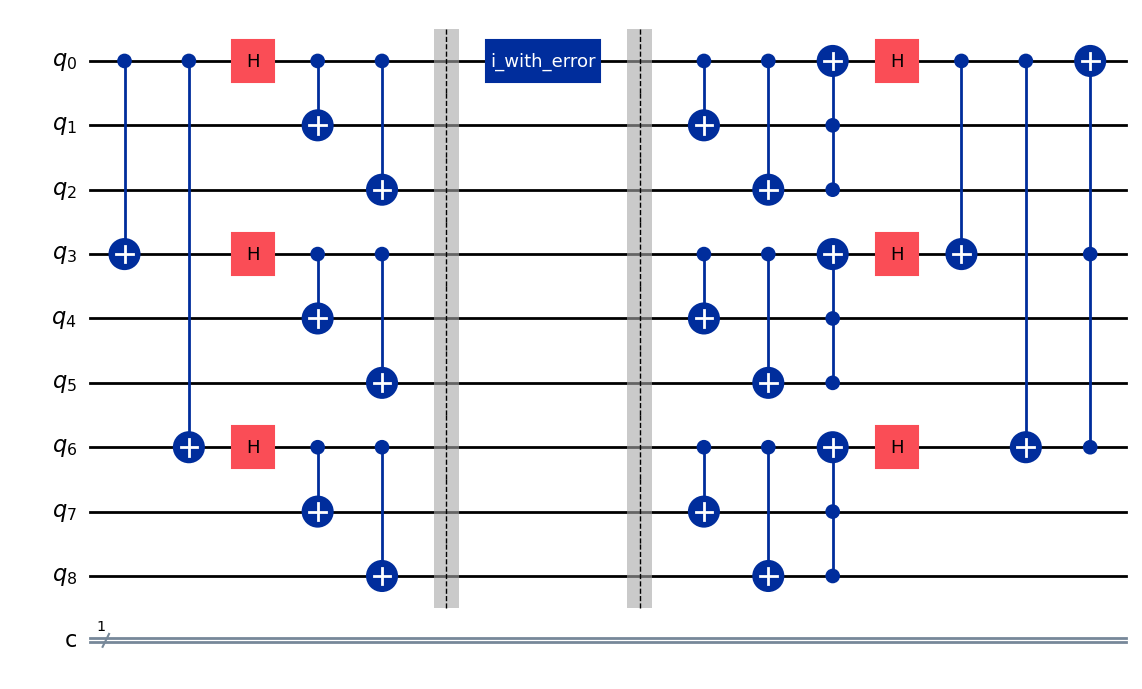

In [103]:
def error_correcting_circuit():
    qc = QuantumCircuit(9)
    
    qc = qc.compose(encoding_circuit(), [0,3,6])
    qc = qc.compose(phase_correction(), [0,3,6])
    
    qc = qc.compose(encoding_circuit(), [0,1,2])
    qc = qc.compose(encoding_circuit(), [3,4,5])
    qc = qc.compose(encoding_circuit(), [6,7,8])
    
    qc.barrier()
    qc = qc.compose(noise_circuit(), [0])
    qc.barrier()

    
    qc = qc.compose(decoding_circuit(), [0,1,2])
    qc = qc.compose(decoding_circuit(), [3,4,5])
    qc = qc.compose(decoding_circuit(), [6,7,8])
        
    qc = qc.compose(phase_correction(), [0,3,6])
    qc = qc.compose(decoding_circuit(), [0,3,6])
    
    return qc

# Draw the resulting circuit
error_correcting_circuit().draw('mpl')

In [116]:
# Simulate the results without error correction
qc_error = noise_circuit()
qc_error.measure(0,0)
sim = AerSimulator(noise_model = noise())
result = sim.run(qc_error).result()

print("Measuring the first qubit with error correction: ", result.get_counts())


# Simulate the results with error correction
qc = error_correcting_circuit()
qc.measure(0,0)
sim = AerSimulator(noise_model = noise())
result = sim.run(qc).result()

print("Measuring the first qubit with error correction: ", result.get_counts())

Measuring the first qubit with error correction:  {'0': 764, '1': 260}
Measuring the first qubit with error correction:  {'0': 1024}
